In [1]:
!pip install numpy pandas scikit-learn nltk
!pip install matplotlib seaborn wordcloud


In [2]:
import nltk
import random
import string
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Download dataset
nltk.download('movie_reviews')

# Load movie reviews dataset
def load_data():
    documents = [(list(movie_reviews.words(fileid)), category)
                 for category in movie_reviews.categories()
                 for fileid in movie_reviews.fileids(category)]
    
    # Shuffle data to ensure randomness
    random.shuffle(documents)
    
    # Extract text and labels
    texts = [" ".join(words) for words, label in documents]
    labels = [1 if label == 'pos' else 0 for _, label in documents]
    
    return texts, labels

texts, labels = load_data()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Data Preprocessing Complete!")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\maury\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Data Preprocessing Complete!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
import numpy as np


C:\Users\maury\AppData\Local\Temp\ipykernel_42872\591524030.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Negative", "Positive"], y=[label_counts[0], label_counts[1]], palette=["red", "green"])


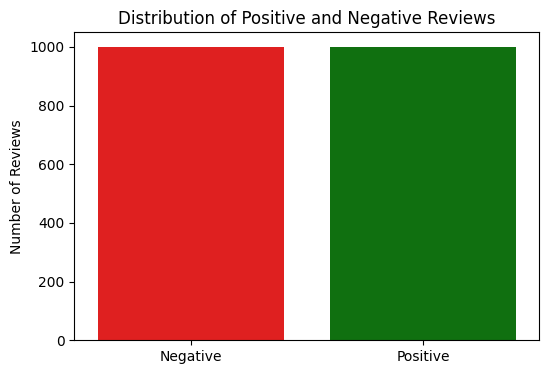

In [4]:
# Count positive and negative reviews
label_counts = Counter(labels)

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=["Negative", "Positive"], y=[label_counts[0], label_counts[1]], palette=["red", "green"])
plt.title("Distribution of Positive and Negative Reviews")
plt.ylabel("Number of Reviews")
plt.show()


In [5]:
from nltk.corpus import stopwords


nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maury\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\maury\AppData\Local\Temp\ipykernel_42872\4294300999.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette=color)


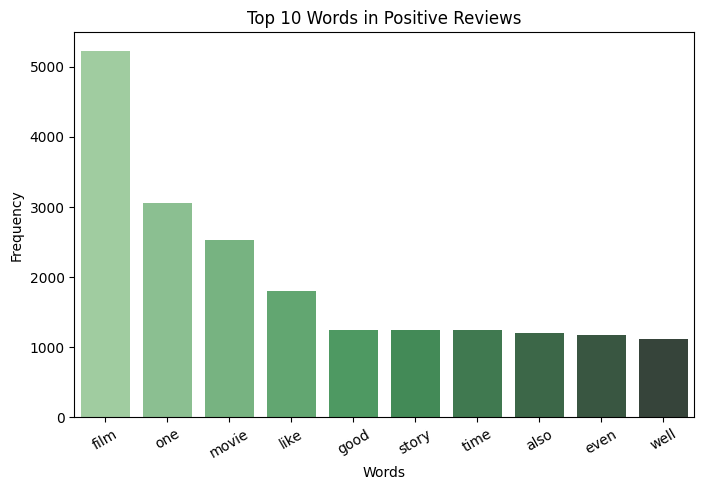

C:\Users\maury\AppData\Local\Temp\ipykernel_42872\4294300999.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette=color)


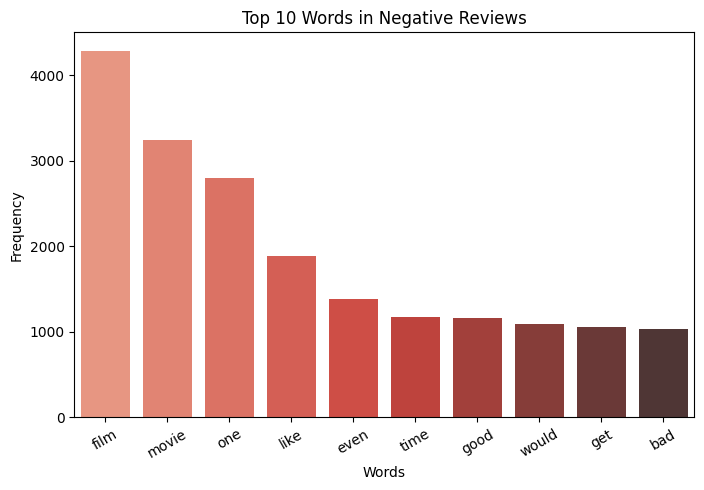

In [6]:
def plot_most_common_words(reviews, title, color):
    # Tokenize words and remove stopwords
    words = [word.lower() for review in reviews for word in review.split() if word.isalpha() and word.lower() not in stop_words]
    
    # Count word frequencies
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)  # Get top 10 words
    
    # Separate words and their counts
    words, counts = zip(*most_common_words)
    
    # Plot bar chart
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(words), y=list(counts), palette=color)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=30)
    plt.show()

# Separate positive and negative reviews
positive_reviews = [texts[i] for i in range(len(labels)) if labels[i] == 1]
negative_reviews = [texts[i] for i in range(len(labels)) if labels[i] == 0]

# Plot most common words in positive and negative reviews
plot_most_common_words(positive_reviews, "Top 10 Words in Positive Reviews", "Greens_d")
plot_most_common_words(negative_reviews, "Top 10 Words in Negative Reviews", "Reds_d")

In [7]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.83


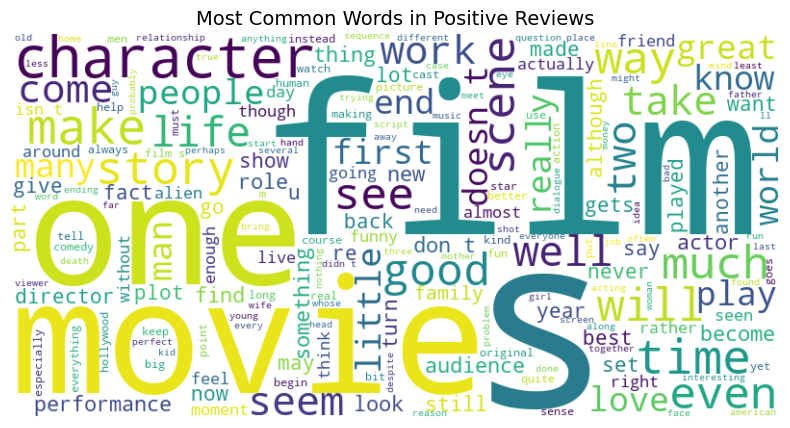

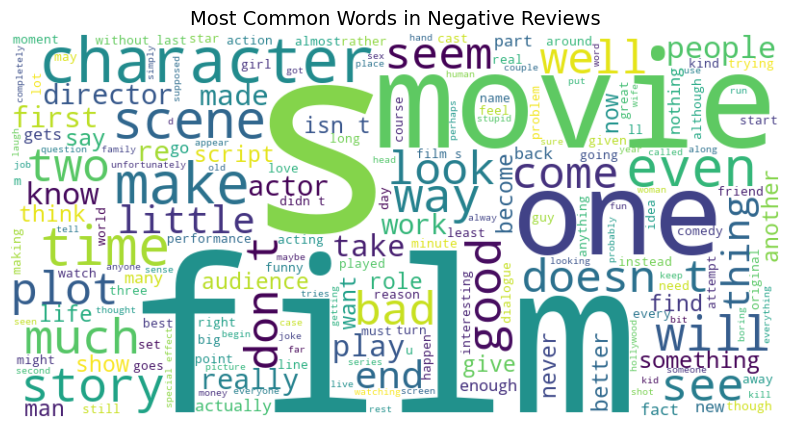

In [8]:
# Function to generate word cloud
def plot_wordcloud(reviews, title):
    text = " ".join(reviews)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

# Separate positive and negative reviews
positive_reviews = [texts[i] for i in range(len(labels)) if labels[i] == 1]
negative_reviews = [texts[i] for i in range(len(labels)) if labels[i] == 0]

# Plot word clouds
plot_wordcloud(positive_reviews, "Most Common Words in Positive Reviews")
plot_wordcloud(negative_reviews, "Most Common Words in Negative Reviews")

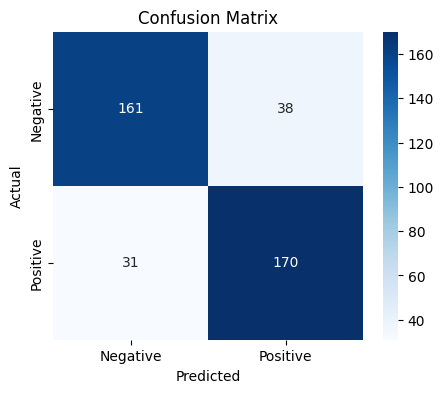

In [9]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    prediction = model.predict(review_tfidf)[0]
    return "Positive" if prediction == 1 else "Negative"

# Example predictions
print(predict_sentiment("This movie was fantastic, I loved it!"))
print(predict_sentiment("It was a boring and terrible experience."))

Positive
Negative
